In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from nltk.corpus import stopwords
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [3]:
data=pd.read_csv("XSS_dataset.csv")
data.head()

,Unnamed: 0,Sentence,Label
0,0,"<li><a href=""/wiki/File:Socrates.png"" class=""i...",0
1,1,"<tt onmouseover=""alert(1)"">test</tt>",1
2,2,"\t </span> <span class=""reference-text"">Steeri...",0
3,3,"\t </span> <span class=""reference-text""><cite ...",0
4,4,"\t </span>. <a href=""/wiki/Digital_object_iden...",0


In [4]:
 # Fetching sentences and labels
    
data=data[data.columns[-2:]] 

In [5]:
data.head()

,Sentence,Label
0,"<li><a href=""/wiki/File:Socrates.png"" class=""i...",0
1,"<tt onmouseover=""alert(1)"">test</tt>",1
2,"\t </span> <span class=""reference-text"">Steeri...",0
3,"\t </span> <span class=""reference-text""><cite ...",0
4,"\t </span>. <a href=""/wiki/Digital_object_iden...",0


In [10]:
# Fetching sentences from the data

data_sentence=data['Sentence'].values
print("The fetched sentence is:",data_sentence[5])

print("The length of sentence is:",len(data_sentence))

The fetched sentence is: <li id="cite_note-118"><span class="mw-cite-backlink"><b><a href="#cite_ref-118">^ </a> </b> 
The length of sentence is: 13686


In [16]:
X=data['Sentence']
y=data['Label']
# Balancing the dataset

# sm = SMOTE()
# X, y = sm.fit_resample(X, y)

# # Standardizing the values in dataset

# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# Splitting the training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<IPython.core.display.Javascript object>

In [18]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sunit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
vectorizer = CountVectorizer(min_df = 2, max_df = 0.8, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(X.values.astype('U')).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(10948, 5640)
(10948,)
(2738, 5640)
(2738,)


### Logistic regression model

Accuracy of logistic regression classifier model is: 99.85390796201608
[[1297    1]
 [   3 1437]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1298
           1       1.00      1.00      1.00      1440

    accuracy                           1.00      2738
   macro avg       1.00      1.00      1.00      2738
weighted avg       1.00      1.00      1.00      2738



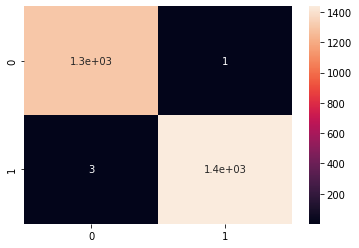

In [22]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

y_pred_LR = LR_model.predict(X_test)
print('Accuracy of logistic regression classifier model is:', accuracy_score(y_test,y_pred_LR)*100)

print(confusion_matrix(y_test,y_pred_LR))
sns.heatmap(confusion_matrix(y_test,y_pred_LR),annot=True)

print(classification_report(y_test,y_pred_LR))

### Random Forest model

Accuracy of Random Forest classifier model is: 99.89043097151206
[[1297    1]
 [   2 1438]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1298
           1       1.00      1.00      1.00      1440

    accuracy                           1.00      2738
   macro avg       1.00      1.00      1.00      2738
weighted avg       1.00      1.00      1.00      2738



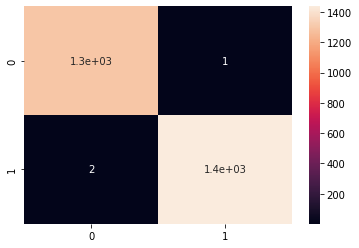

In [23]:
RF_model=RandomForestClassifier()
RF_model.fit(X_train,y_train)

y_pred_RF=RF_model.predict(X_test)

print('Accuracy of Random Forest classifier model is:', accuracy_score(y_test,y_pred_RF)*100)

print(confusion_matrix(y_test,y_pred_RF))
sns.heatmap(confusion_matrix(y_test,y_pred_RF),annot=True)

print(classification_report(y_test,y_pred_RF))

### CNN model

In [30]:
classifier = Sequential() 

classifier.add(Dense(units = 9, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 5640))
classifier.add(Dense(units = 9, kernel_initializer = 'he_uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 9)                 50769     
                                                                 
 dense_7 (Dense)             (None, 9)                 90        
                                                                 
 dense_8 (Dense)             (None, 1)                 10        
                                                                 
Total params: 50,869
Trainable params: 50,869
Non-trainable params: 0
_________________________________________________________________


In [31]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model=classifier.fit(X_train, y_train, batch_size = 10, epochs = 20)

Epoch 1/20
1095/1095 [==============================] - 2s 1ms/step - loss: 0.0848 - accuracy: 0.9803
Epoch 2/20
1095/1095 [==============================] - 1s 1ms/step - loss: 0.0069 - accuracy: 0.9982
Epoch 3/20
1095/1095 [==============================] - 1s 1ms/step - loss: 0.0039 - accuracy: 0.9987
Epoch 4/20
1095/1095 [==============================] - 1s 1ms/step - loss: 0.0027 - accuracy: 0.9993
Epoch 5/20
1095/1095 [==============================] - 1s 1ms/step - loss: 0.0021 - accuracy: 0.9995
Epoch 6/20
1095/1095 [==============================] - 1s 1ms/step - loss: 0.0017 - accuracy: 0.9997
Epoch 7/20
1095/1095 [==============================] - 1s 1ms/step - loss: 0.0017 - accuracy: 0.9997
Epoch 8/20
1095/1095 [==============================] - 1s 1ms/step - loss: 0.0015 - accuracy: 0.9997
Epoch 9/20
1095/1095 [==============================] - 1s 1ms/step - loss: 0.0015 - accuracy: 0.9997
Epoch 10/20
1095/1095 [==============================] - 1s 1ms/step - loss: 0.001

86/86 [==============================] - 0s 1ms/step
dict_keys(['loss', 'accuracy'])


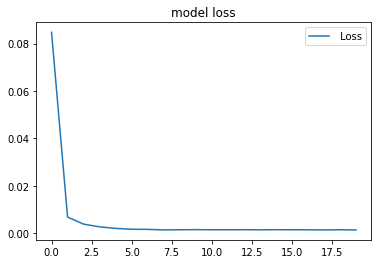

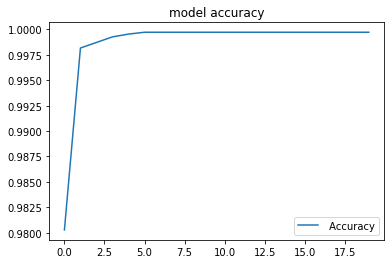

In [39]:
y_pred_cnn = classifier.predict(X_test)
print(model.history.keys())

plt.plot(model.history["loss"], label =" Loss")
plt.legend()
plt.title('model loss')
plt.show()
plt.figure()
plt.plot(model.history["accuracy"], label =" Accuracy")
plt.legend()
plt.title('model accuracy')
plt.show()